In [5]:
# Downloading the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-18 03:26:31--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   127MB/s    in 0.5s    

2023-09-18 03:26:31 (127 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
import os
import zipfile

#Extracting the dataset
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip",'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [7]:
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate = 1e-4),
                metrics = ['accuracy'])

  return model

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
Epochs = 20

model = create_model()

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = Epochs,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 2)

Epoch 1/20
100/100 - 19s - loss: 0.6887 - accuracy: 0.5375 - val_loss: 0.6849 - val_accuracy: 0.5310 - 19s/epoch - 185ms/step
Epoch 2/20
100/100 - 5s - loss: 0.6675 - accuracy: 0.5930 - val_loss: 0.6719 - val_accuracy: 0.5780 - 5s/epoch - 46ms/step
Epoch 3/20
100/100 - 5s - loss: 0.6336 - accuracy: 0.6460 - val_loss: 0.6229 - val_accuracy: 0.6430 - 5s/epoch - 54ms/step
Epoch 4/20
100/100 - 4s - loss: 0.5917 - accuracy: 0.6825 - val_loss: 0.6078 - val_accuracy: 0.6650 - 4s/epoch - 44ms/step
Epoch 5/20
100/100 - 6s - loss: 0.5586 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6840 - 6s/epoch - 56ms/step
Epoch 6/20
100/100 - 5s - loss: 0.5392 - accuracy: 0.7270 - val_loss: 0.5696 - val_accuracy: 0.7030 - 5s/epoch - 46ms/step
Epoch 7/20
100/100 - 5s - loss: 0.5212 - accuracy: 0.7330 - val_loss: 0.5743 - val_accuracy: 0.7100 - 5s/epoch - 53ms/step
Epoch 8/20
100/100 - 6s - loss: 0.4984 - accuracy: 0.7560 - val_loss: 0.5682 - val_accuracy: 0.6970 - 6s/epoch - 56ms/step
Epoch 9/20
10

In [3]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
  plt.title('Taining and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label = 'Training Loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
  plt.legend()

  plt.show()

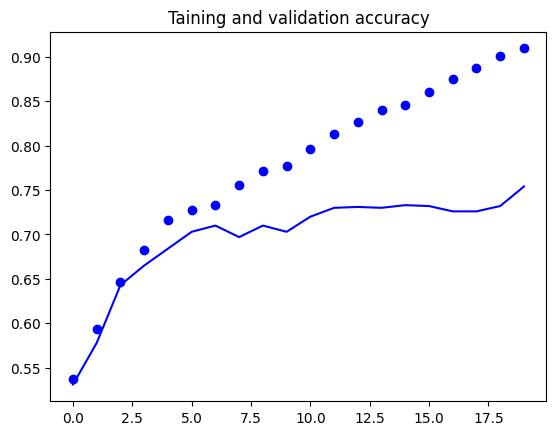

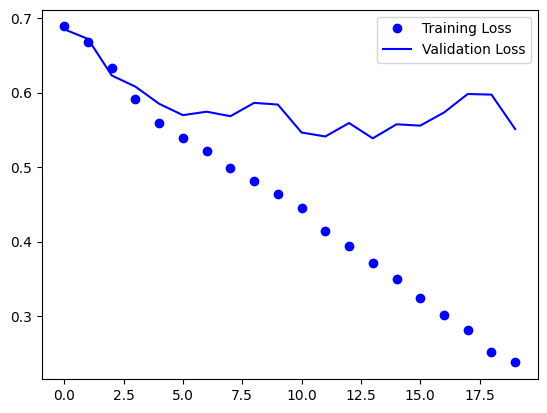

In [12]:
plot_loss_acc(history)

In [16]:
# New model with image augmentation applied to prevent overfitting
model_for_aug = create_model()


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 90,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

history_with_aug = model_for_aug.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = Epochs,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 16s - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6970 - val_accuracy: 0.5000 - 16s/epoch - 163ms/step
Epoch 2/20
100/100 - 15s - loss: 0.6863 - accuracy: 0.5435 - val_loss: 0.6722 - val_accuracy: 0.6020 - 15s/epoch - 153ms/step
Epoch 3/20
100/100 - 14s - loss: 0.6804 - accuracy: 0.5395 - val_loss: 0.6573 - val_accuracy: 0.5980 - 14s/epoch - 141ms/step
Epoch 4/20
100/100 - 15s - loss: 0.6726 - accuracy: 0.5680 - val_loss: 0.6985 - val_accuracy: 0.5140 - 15s/epoch - 147ms/step
Epoch 5/20
100/100 - 16s - loss: 0.6645 - accuracy: 0.5850 - val_loss: 0.6382 - val_accuracy: 0.6290 - 16s/epoch - 155ms/step
Epoch 6/20
100/100 - 14s - loss: 0.6555 - accuracy: 0.6135 - val_loss: 0.6237 - val_accuracy: 0.6470 - 14s/epoch - 143ms/step
Epoch 7/20
100/100 - 15s - loss: 0.6438 - accuracy: 0.6185 - val_loss: 0.6194 - val_accuracy: 0.6410 - 15s/epoch - 153ms/step
Epoch 8/20
100/100 - 15s - loss: 0

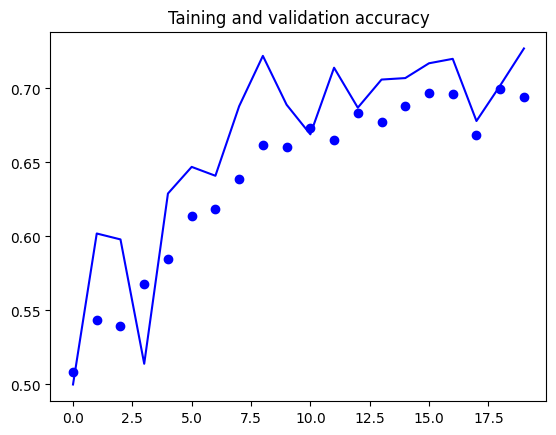

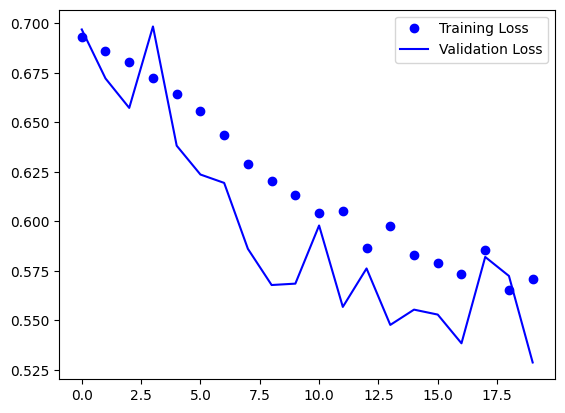

In [17]:
plot_loss_acc(history_with_aug)